In [35]:
import warnings
warnings.simplefilter('ignore')

In [23]:
#Importing Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [24]:
#Importing the dataset
data = pd.read_csv('Universities.csv')
data = data.iloc[:,1:]

In [25]:
#Normalise the data
scale = StandardScaler()
data_normalise = scale.fit_transform(data)

In [37]:
#Model Building
clusters = KMeans(n_clusters=3)
Model = clusters.fit(data_normalise)

In [38]:
#Group IDs
Membership_ID = Model.labels_

In [39]:
#Assigning membership_id to dataset
data['MembershipID'] = Membership_ID

In [47]:
#Grouping membershipID using mean
Newdata = round(data.groupby(Membership_ID).mean(),2)
Newdata.to_csv('clusters.csv',header=True,index=False)

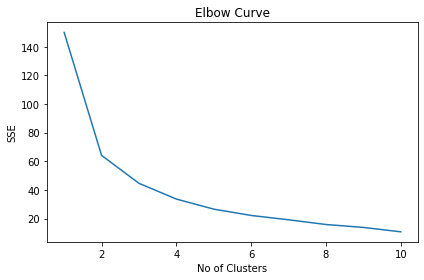

In [44]:
#Optial value for K
SSE = []
for i in range(1,11):
    clus = KMeans(n_clusters=i)
    Mod = clus.fit(data_normalise)
    SSE.append(Mod.inertia_)

#Plotting the elbow curve
plt.plot(range(1,11),SSE)
plt.xlabel('No of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Curve')
plt.tight_layout()
plt.show()